# Markov Chain Monte Carlo (MCMC) Sampling with the Metropolis Algorithm

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import ProgressBar

In [7]:
def random_state(shape):
    return np.random.randint(0,2,shape)*2 - 1

## Outline of Algorithm (Metropolis Step):

0. Start with a random state (1).
1. Consider a random change to the state. In particular, choose one spin at random and consider flipping it. The new candidate state is state (2).
2. Compute the ratio of the probabilities $ r=P_2/P_1 $. For a thermal system, this is the relative Boltzmann factor $r=\exp(-(E_2-E_1)/kT)$.
3. If $r \ge 1$, accept the change. If $r < 1$, accept the change with probability $r$. If the change is rejected, state (1) is sampled a second time.
4. Repeat from step 1.

Over a long period of time, the states will be sampled proportionally to their probabilities (Boltzmann factors). In practice, an initial number of Metropolis steps are performed without retaining the results; this is the ''burn in'' phase. Then, between each sample, many Metropolis steps are performed in order to make the samples statistically independent.

In [74]:
def metropolis_step(state, kT, b, nSteps=1):
    """
        Take one Metropolis step on the input state. The state is modified (or not) in place, so nothing is returned.
        Energy function is for the 2-state paramagnet in magnetic field *b* at temperature *kT*.
    """
    for _ in range(nSteps):
        idx = np.random.randint(len(state)) # pick a random spin
        deltaE = 2*state[idx]*b # E = -mu B; dE = -(-mu B) - (-mu B) = 2 mu B
        r = np.exp(-deltaE/kT)
        if r >= 1 or np.random.uniform() < r:
            state[idx] *= -1

In [75]:
s = random_state(10)
print(s)

[-1 -1 -1 -1 -1  1  1 -1 -1  1]


In [101]:
metropolis_step(s, 10, 1, 100)
print(s)

[ 1  1 -1 -1 -1 -1 -1 -1  1 -1]


In [110]:
N = 100
Nsamples = 1000
kT = 10
b = 1
mags = np.zeros(Nsamples)
s = random_state(N)
metropolis_step(s, kT, b, N) # burn-in
progress = ProgressBar(Nsamples)
for i in progress:
    metropolis_step(s, kT, b, N) # burn N steps to get an indep. sample
    mags[i] = np.sum(s)

[============================================================] 1000/1000

(array([  6.,  27.,  83., 156., 201., 220., 178.,  82.,  38.,   9.]),
 array([-22. , -15.8,  -9.6,  -3.4,   2.8,   9. ,  15.2,  21.4,  27.6,
         33.8,  40. ]),
 <BarContainer object of 10 artists>)

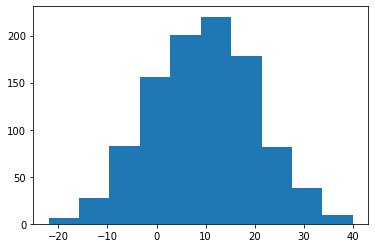

In [111]:
plt.hist(mags)

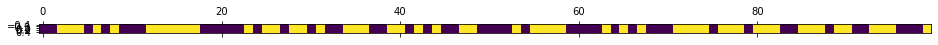

In [112]:
plt.matshow([s])

In [113]:
def avg_mag(kT, b, N=100, Nsamples=1000):
    mags = np.zeros(Nsamples)
    s = random_state(N)
    metropolis_step(s, kT, b, N) # burn-in
    for i in range(Nsamples):
        metropolis_step(s, kT, b, N) # burn N steps to get an indep. sample
        mags[i] = np.sum(s)
    return np.mean(mags)

In [117]:
temps = np.linspace(0,3,100)
mags = np.zeros_like(temps)
progress = ProgressBar(len(temps))
for i in progress:
    mags[i] = avg_mag(temps[i],1)

[============================================================] 100/100

/opt/conda/envs/python_tf21/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


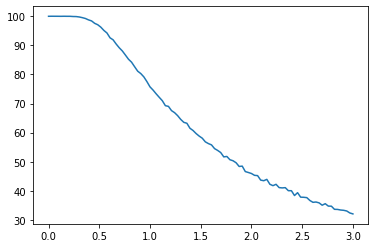

In [118]:
plt.plot(temps,mags)

/opt/conda/envs/python_tf21/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


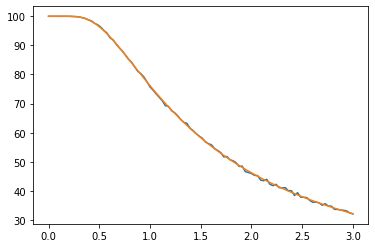

In [119]:
plt.plot(temps, mags)
plt.plot(temps, 100*np.tanh(1/temps))